<a href="https://colab.research.google.com/github/saurabhsingh1411/stock_price_prediction_rnn/blob/master/stock_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing lib and dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
dataset_train=pd.read_csv('trainset.csv')


In [3]:
dataset_train.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-02,357.385559,361.151062,355.959839,359.288177,359.288177,5115500
1,2013-01-03,360.122742,363.600128,358.031342,359.496826,359.496826,4666500
2,2013-01-04,362.313507,368.339294,361.488861,366.600616,366.600616,5562800
3,2013-01-07,365.348755,367.301056,362.929504,365.001007,365.001007,3332900
4,2013-01-08,365.393463,365.771027,359.874359,364.280701,364.280701,3373900


In [4]:
trainset=dataset_train.iloc[:,1:2]

In [5]:
trainset.head()

,Open
0,357.385559
1,360.122742
2,362.313507
3,365.348755
4,365.393463


In [8]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler(feature_range=(0,1))
training_scaled=sc.fit_transform(trainset)

training_scaled

array([[0.01011148],
       [0.01388614],
       [0.01690727],
       ...,
       [0.97543954],
       [0.9674549 ],
       [0.96072522]])

## **Preprocessing Text**

In [9]:
x_train=[]
y_train=[]

for i in range(60,1259):
  x_train.append(training_scaled[i-60:i,0])
  y_train.append(training_scaled[i,0])

x_train,y_train=np.array(x_train),np.array(y_train)

In [13]:
x_train.shape

(1199, 60)

In [14]:
x_train=np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

print(x_train.shape)

(1199, 60, 1)


## Model preparations 

In [17]:
from keras.models import Sequential
from keras.layers import Dense 
from keras.layers import LSTM 
from keras.layers import Dropout 

In [19]:
model=Sequential()

model.add(LSTM(units=50,return_sequences=True,input_shape=(x_train.shape[1],1)))

model.add(Dropout(0.2))

model.add(LSTM(units=50,return_sequences=True))

model.add(Dropout(0.2))

model.add(LSTM(units=50,return_sequences=True))

model.add(Dropout(0.2))

model.add(LSTM(units=50))

model.add(Dropout(0.2))

model.add(Dense(units=1))

In [20]:
model.compile(optimizer='adam',loss='mean_squared_error')

In [22]:
model.fit(x_train,y_train,epochs=100,batch_size=32)

Epoch 1/100
38/38 [==============================] - 5s 123ms/step - loss: 0.0011
Epoch 2/100
38/38 [==============================] - 5s 126ms/step - loss: 9.1669e-04
Epoch 3/100
38/38 [==============================] - 5s 123ms/step - loss: 9.5572e-04
Epoch 4/100
38/38 [==============================] - 5s 126ms/step - loss: 0.0010
Epoch 5/100
38/38 [==============================] - 5s 124ms/step - loss: 0.0010
Epoch 6/100
38/38 [==============================] - 5s 125ms/step - loss: 9.5545e-04
Epoch 7/100
38/38 [==============================] - 5s 124ms/step - loss: 0.0011
Epoch 8/100
38/38 [==============================] - 5s 125ms/step - loss: 0.0010
Epoch 9/100
38/38 [==============================] - 5s 126ms/step - loss: 9.6328e-04
Epoch 10/100
38/38 [==============================] - 5s 125ms/step - loss: 9.9678e-04
Epoch 11/100
38/38 [==============================] - 5s 125ms/step - loss: 9.4162e-04
Epoch 12/100
38/38 [==============================] - 5s 125ms/step - lo

In [23]:
dataset_test=pd.read_csv('testset.csv')

real_stock_price=dataset_test.iloc[:,1:2].values

In [24]:
dataset_total=pd.concat((dataset_train['Open'],dataset_test['Open']),axis=0)

dataset_total

0       357.385559
1       360.122742
2       362.313507
3       365.348755
4       365.393463
          ...     
120    1143.599976
121    1128.000000
122    1121.339966
123    1102.089966
124    1120.000000
Name: Open, Length: 1384, dtype: float64

In [29]:
inputs = dataset_total[len(dataset_total) - len(dataset_test)-60:].values
inputs

array([ 955.48999 ,  966.700012,  980.      ,  980.      ,  973.719971,
        987.450012,  992.      ,  992.099976,  990.289978,  991.77002 ,
        986.      ,  989.440002,  989.52002 ,  970.      ,  968.369995,
        980.      , 1009.190002, 1014.      , 1015.219971, 1017.210022,
       1021.76001 , 1022.109985, 1028.98999 , 1027.27002 , 1030.52002 ,
       1033.98999 , 1026.459961, 1023.419983, 1022.590027, 1019.210022,
       1022.52002 , 1034.01001 , 1020.26001 , 1023.309998, 1035.      ,
       1035.869995, 1040.      , 1055.089966, 1042.680054, 1022.369995,
       1015.799988, 1012.659973,  995.940002, 1001.5     , 1020.429993,
       1037.48999 , 1035.5     , 1039.630005, 1046.119995, 1045.      ,
       1054.609985, 1066.079956, 1075.199951, 1071.780029, 1064.949951,
       1061.109985, 1058.069946, 1057.390015, 1051.599976, 1046.719971,
       1048.339966, 1064.310059, 1088.      , 1094.      , 1102.22998 ,
       1109.400024, 1097.099976, 1106.300049, 1102.410034, 1132.

In [30]:
inputs=inputs.reshape(-1,1)

inputs.shape

(185, 1)

In [31]:
inputs = sc.transform(inputs)
inputs.shape

(185, 1)

In [32]:
x_test = []
for i in range(60,185):
    x_test.append(inputs[i-60:i,0])

In [33]:
x_test = np.array(x_test)
x_test.shape

(125, 60)

In [35]:
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))
x_test.shape

(125, 60, 1)

In [36]:
predicted_price=model.predict(x_test)

In [37]:
predicted_price=sc.inverse_transform(predicted_price)

predicted_price

array([[1054.5847],
       [1054.2286],
       [1060.9823],
       [1073.8494],
       [1081.5006],
       [1086.7972],
       [1091.6693],
       [1089.3823],
       [1091.8744],
       [1092.9423],
       [1105.2223],
       [1109.4236],
       [1112.1848],
       [1113.9694],
       [1117.361 ],
       [1127.702 ],
       [1139.1989],
       [1142.4696],
       [1144.2589],
       [1146.3346],
       [1145.2186],
       [1146.1786],
       [1144.9319],
       [1130.7501],
       [1112.4619],
       [1081.9706],
       [1088.413 ],
       [1086.0624],
       [1066.9955],
       [1067.376 ],
       [1068.2877],
       [1068.2589],
       [1078.5507],
       [1086.2252],
       [1088.5012],
       [1094.3103],
       [1100.7012],
       [1101.9603],
       [1107.8119],
       [1116.1954],
       [1113.475 ],
       [1105.8751],
       [1082.7251],
       [1080.3928],
       [1092.6366],
       [1094.4844],
       [1102.742 ],
       [1114.0925],
       [1128.5028],
       [1136.4231],


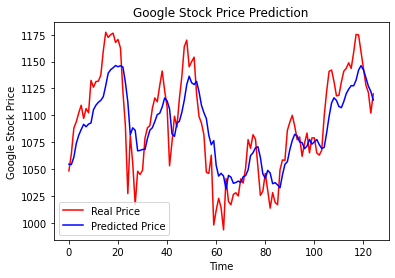

In [38]:
plt.plot(real_stock_price,color = 'red', label = 'Real Price')
plt.plot(predicted_price, color = 'blue', label = 'Predicted Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()